In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [ ]:
covid_data = pd.read_csv('covid_19_clean_complete.csv')
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
covid_data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [ ]:
covid_data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

In [ ]:
"""
 5   Confirmed       49068 non-null  int64
 6   Deaths          49068 non-null  int64
 7   Recovered       49068 non-null  int64
 8   Active          49068 non-null  int64
 """

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.stats.durbin_watson(covid_data['Confirmed'])

1.9582652252691064

In [ ]:
sm.stats.durbin_watson(covid_data['Deaths'])

1.9783752272041735

In [ ]:
Recovered

1.9275412897470758

In [ ]:
sm.stats.durbin_watson(covid_data['Active'])

1.9827116482632792

In [ ]:
covid_data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
covid_data['Date'].nunique()

188

In [ ]:
# Group the country details basis date
total = covid_data.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [ ]:
total

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


# Import Facebook Prophet Model

In [ ]:
#!pip install pystan

In [ ]:
#!python -m pip install prophet

In [ ]:
import prophet

In [ ]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'hdays',
 'here',
 'make_holidays',
 'models',
 'plot']

![image.png](attachment:image.png)

In [ ]:
df_prophet = total.rename(columns={'Date':'ds', 'Confirmed':'y'})

In [ ]:
df_prophet

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [ ]:
from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

09:09:37 - cmdstanpy - INFO - Chain [1] start processing
09:09:47 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
len(df_prophet)

188

In [ ]:
df_prophet

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [ ]:
model

In [ ]:
future_pred = model.make_future_dataframe(periods=100, freq='D')

In [ ]:
future_pred

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
283,2020-10-31
284,2020-11-01
285,2020-11-02
286,2020-11-03


# Prediting future forecasting

In [ ]:
prediction = model.predict(future_pred)

In [ ]:
prediction.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9445.493329,-125076.895730,94217.645775,-9445.493329,-9445.493329,-10997.897085,-10997.897085,-10997.897085,-10997.897085,-10997.897085,-10997.897085,0.0,0.0,0.0,-20443.390414
1,2020-01-23,-6740.790161,-113377.341355,87976.723198,-6740.790161,-6740.790161,-1101.108996,-1101.108996,-1101.108996,-1101.108996,-1101.108996,-1101.108996,0.0,0.0,0.0,-7841.899157


In [ ]:
prediction[['ds', 'yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
278,2020-10-26,3.469590e+07,3.214659e+07,3.744513e+07
279,2020-10-27,3.488516e+07,3.233148e+07,3.760919e+07
280,2020-10-28,3.509503e+07,3.240843e+07,3.792410e+07
281,2020-10-29,3.530894e+07,3.267084e+07,3.816244e+07
282,2020-10-30,3.552412e+07,3.281870e+07,3.841920e+07
283,2020-10-31,3.573181e+07,3.294645e+07,3.870644e+07
284,2020-11-01,3.592935e+07,3.313720e+07,3.889510e+07
285,2020-11-02,3.612398e+07,3.323699e+07,3.913772e+07
286,2020-11-03,3.631324e+07,3.340387e+07,3.939048e+07
287,2020-11-04,3.652312e+07,3.355198e+07,3.964728e+07


In [ ]:
len(prediction)

288

In [ ]:
prediction.to_csv('covid_prediction_dataset.csv')

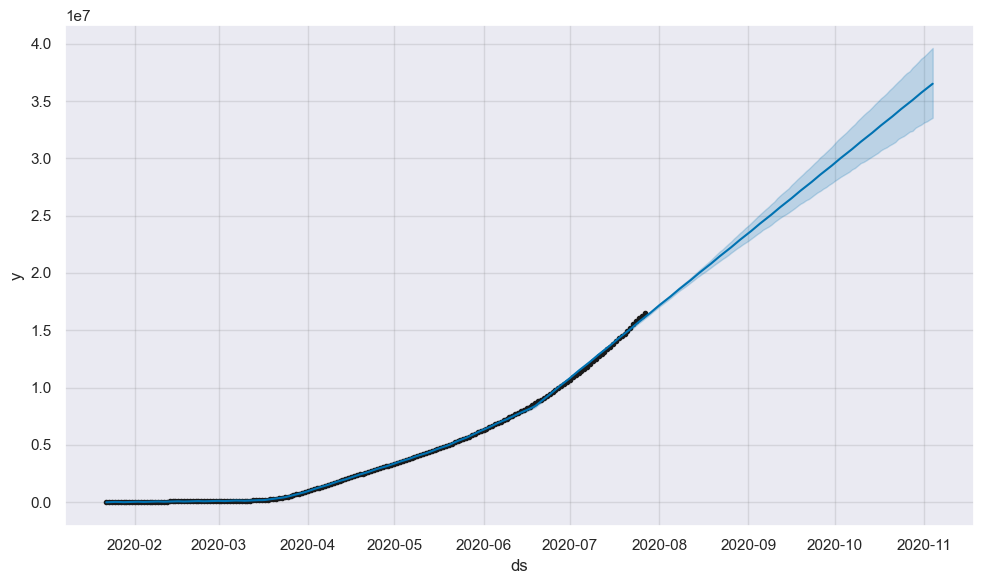

In [ ]:
# plot the model
model.plot(prediction)
plt.show()

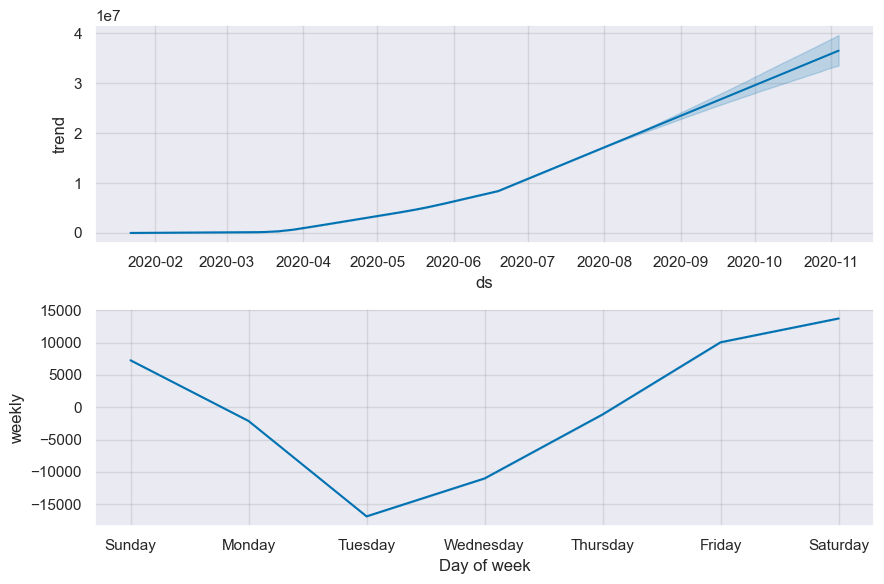

In [ ]:
model.plot_components(prediction)
plt.show()

# To check the performance - cross validation and performance matrix

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial='90 days')

  0%|          | 0/5 [00:00<?, ?it/s]

09:39:14 - cmdstanpy - INFO - Chain [1] start processing
09:39:15 - cmdstanpy - INFO - Chain [1] done processing
09:39:16 - cmdstanpy - INFO - Chain [1] start processing
09:39:16 - cmdstanpy - INFO - Chain [1] done processing
09:39:16 - cmdstanpy - INFO - Chain [1] start processing
09:39:17 - cmdstanpy - INFO - Chain [1] done processing
09:39:17 - cmdstanpy - INFO - Chain [1] start processing
09:39:17 - cmdstanpy - INFO - Chain [1] done processing
09:39:18 - cmdstanpy - INFO - Chain [1] start processing
09:39:18 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196010e+06,3.206443e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.278872e+06,3.291715e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361467e+06,3.377834e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.438127e+06,3.461880e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.512549e+06,3.547738e+06,3515244,2020-04-28
...,...,...,...,...,...,...
145,2020-07-23,1.315245e+07,1.286965e+07,1.341418e+07,15510481,2020-06-27
146,2020-07-24,1.329193e+07,1.299538e+07,1.357722e+07,15791645,2020-06-27
147,2020-07-25,1.342827e+07,1.311731e+07,1.373247e+07,16047190,2020-06-27
148,2020-07-26,1.354703e+07,1.322716e+07,1.385799e+07,16251796,2020-06-27


In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
df_performance = performance_metrics(df_cv)

In [ ]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.714808e+10,1.647667e+05,1.290616e+05,0.016856,0.017600,0.017039,0.000000
1,4 days,3.761718e+10,1.939515e+05,1.512328e+05,0.019317,0.022389,0.019562,0.000000
2,5 days,5.159644e+10,2.271485e+05,1.750532e+05,0.021766,0.025749,0.022085,0.066667
3,6 days,6.924995e+10,2.631538e+05,2.020240e+05,0.024543,0.026747,0.024954,0.133333
4,7 days,8.998205e+10,2.999701e+05,2.323610e+05,0.027825,0.031309,0.028348,0.200000
5,8 days,1.143951e+11,3.382235e+05,2.641976e+05,0.031132,0.034969,0.031790,0.200000
6,9 days,1.399463e+11,3.740940e+05,2.954883e+05,0.034317,0.038861,0.035119,0.200000
7,10 days,1.686206e+11,4.106344e+05,3.261934e+05,0.037359,0.043968,0.038310,0.200000
8,11 days,2.010658e+11,4.484036e+05,3.571724e+05,0.040351,0.048816,0.041453,0.200000
9,12 days,2.435972e+11,4.935557e+05,3.924588e+05,0.043529,0.052135,0.044811,0.200000


# visualize

In [ ]:
from prophet.plot import plot_cross_validation_metric

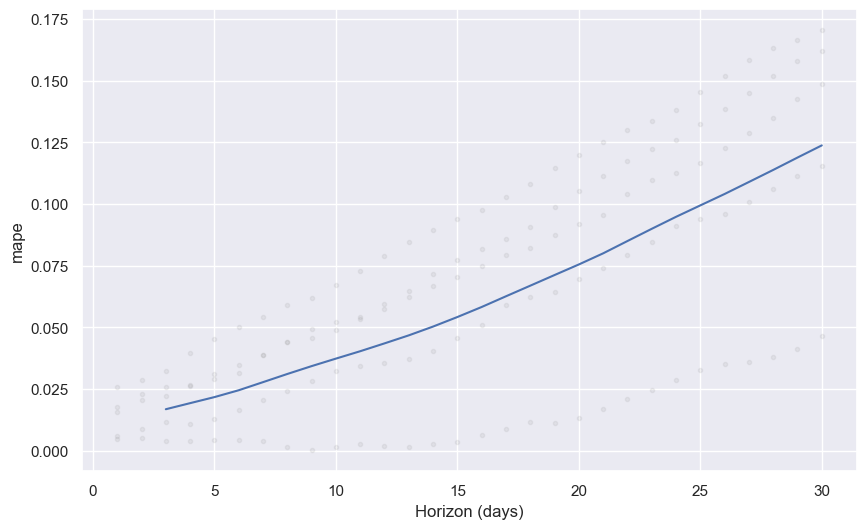

In [ ]:
df_performance = plot_cross_validation_metric(df_cv, metric = 'mape')